In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('../../datasets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [9]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

## Method 1. Using Pandas

In [10]:
X_train['Age_99']= X_train['Age'].fillna(99)
X_train['Age_minus1']= X_train['Age'].fillna(-1)


X_train['Fare_999']= X_train['Fare'].fillna(999)
X_train['Fare_minus1']= X_train['Fare'].fillna(-1)

In [11]:
X_train.sample(10)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
503,37.0,9.5875,0,37.0,37.0,9.5875,9.5875
683,14.0,46.9000,7,14.0,14.0,46.9000,46.9000
541,9.0,31.2750,6,9.0,9.0,31.2750,31.2750
348,3.0,15.9000,2,3.0,3.0,15.9000,15.9000
518,36.0,NaN,1,36.0,36.0,999.0000,-1.0000
779,43.0,211.3375,1,43.0,43.0,211.3375,211.3375
95,NaN,8.0500,0,99.0,-1.0,8.0500,8.0500
835,39.0,83.1583,2,39.0,39.0,83.1583,83.1583
442,25.0,7.7750,1,25.0,25.0,7.7750,7.7750
878,NaN,NaN,0,99.0,-1.0,999.0000,-1.0000


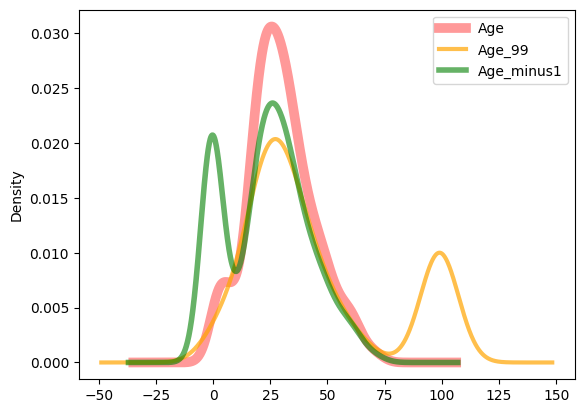

In [12]:
fig, ax = plt.subplots()

X_train['Age'].plot(kind='kde',ax=ax,color='red',linewidth=7,alpha=0.4)

X_train['Age_99'].plot(kind='kde',ax=ax,color='orange',linewidth=3,alpha=0.7)

X_train['Age_minus1'].plot(kind='kde',ax=ax,color='green',linewidth=4,alpha=0.6)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

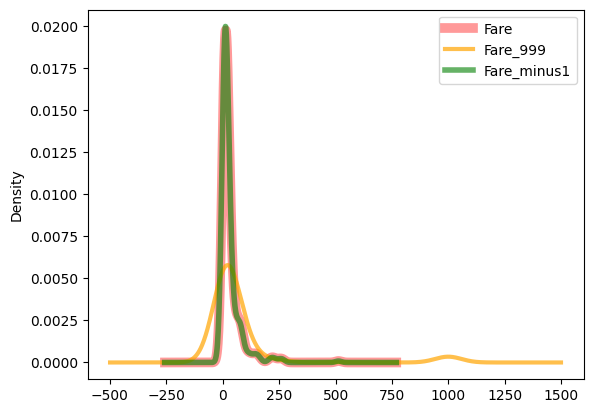

In [13]:
fig, ax = plt.subplots()

X_train['Fare'].plot(kind='kde',ax=ax,color='red',linewidth=7,alpha=0.4)

X_train['Fare_999'].plot(kind='kde',ax=ax,color='orange',linewidth=3,alpha=0.7)

X_train['Fare_minus1'].plot(kind='kde',ax=ax,color='green',linewidth=4,alpha=0.6)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

In [14]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


#### To see the outliers

<AxesSubplot: >

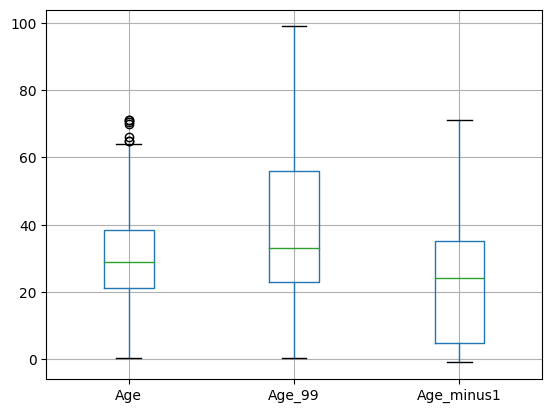

In [15]:
X_train[['Age','Age_99','Age_minus1']].boxplot()

<AxesSubplot: >

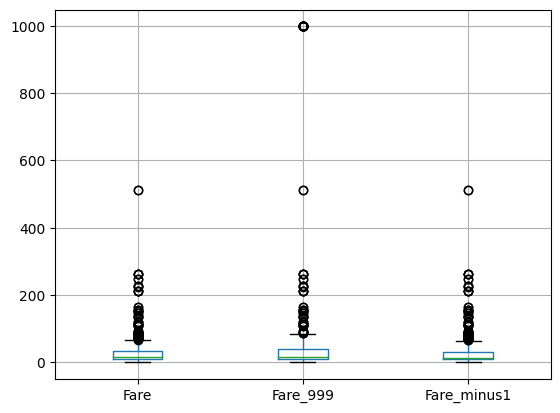

In [16]:
X_train[['Fare','Fare_999','Fare_minus1']].boxplot()

## Method 2. Using Sklearn

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [18]:
imputer_1 = SimpleImputer(strategy='constant',fill_value=99)
imputer_2 = SimpleImputer(strategy='constant',fill_value=-1)

In [19]:
trf = ColumnTransformer([
    ('imputer_1',imputer_1,['Age']),
    ('imputer_2',imputer_2,['Fare']),
    
], remainder='passthrough')

In [20]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer_1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer_2',
                                 SimpleImputer(fill_value=-1,
                                               strategy='constant'),
                                 ['Fare'])])

In [21]:
trf.named_transformers_['imputer_1'].statistics_

array([99.])

In [22]:
trf.named_transformers_['imputer_2'].statistics_

array([-1.])

In [23]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [24]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])